# Exercise Sheet 1 - Down the Rabbit Hole - Sam Eadie  - CSMRI

## Question 1: What is the radio-frequency range? How does it relate to MRI?
The radio frequency range is the specific subspectrum of the electromagnetic spectrum that exists between approximately 20kHz and 300GHz. In MRI, radio-frequencies are important in the excitation, and detection of relaxation, of hydrogen nuclei. After a static magnetic field is applied to align the atom nuclei, a short radiofrequency pulse at the appropriate resonance frequency is emitted, causing the nuclei to flip. After the pulse ends, the nuclei relax and realign with the static magnetic field. In doing so, they emit radiofrequency signals which are then processed and used to compute the MRI. 

## Question 2: What is the nuclear magnetic moment and the gyromagnetic ratio? Describe it for different atoms.
The nuclear magnetic moment describes the moment (tendency to rotate about an axis) of a nuclei when exposed to a magnetic field. Intuitively then, it can be described as: $\tau = m \times B$ where $\tau$ is the torque around the axis, $B$ is the external magnetic field and $m$ is the magnetic moment. Evidently, the nuclear magnetic moment is a vector quantity, and points along the axis of rotation in accordance with the right hand rule. The magnetic moment of nuclei stems from the spin of their constituent protons and neutrons. 

The gyromagnetic ratio is the ratio between the magnetic moment and the angular momentum of a particle, with the intuitive units $rad s^{-1} T^{-1}$. Importantly, this ratio defines the frequency $f$ that a nuclei will precess at when it's magnetic moment is not aligned with the external magnetic field (i.e. Larmor precession) via: $f = \frac{\gamma}{2\pi}B$ 

The nuclear magnetic moment and gyromagnetic ratio are tabulated and plotted below for some common nuclei. 


|Mass |Element |Nuclear Magnetic moment | Gyromagnetic ratio (rad s−1 µT−1) |
|---|---|---------------|-----------|
|1	|H	|2.79284734	    |267.522208 |
|2	|H	|0.857438228	|41.0662919 |
|7	|Li	|3.256427	    |103.97704  |
|13	|C	|0.7024118	    |67.28286   |
|14	|N	|0.40376100	    |19.337798  |
|19	|F	|2.628868	    |251.6233   |
|23	|Na	|2.217522	    |70.808516  |
|31	|P	|1.13160	    |108.394    |
|39	|K	|0.39147		|12.500612  |

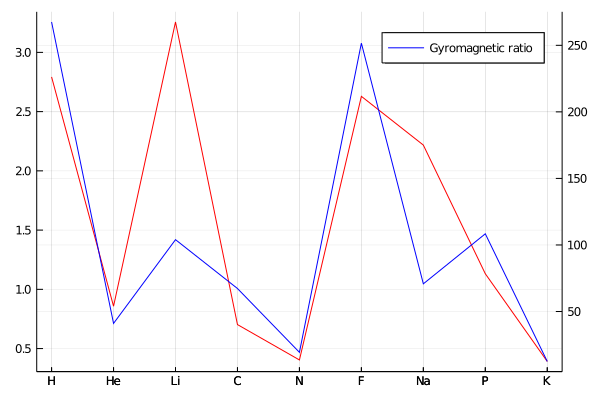

In [1]:
using Plots

elements = ["H", "He", "Li", "C", "N", "F", "Na", "P", "K"]; 
magnetic_moments = [2.79284734, 0.857438228, 3.256427, 0.7024118, 0.40376100, 2.628868, 2.217522, 1.13160, 0.39147];
gyromagnetic_ratios = [267.522208, 41.0662919, 103.97704, 67.28286, 19.337798, 251.6233, 70.808516, 108.394, 12.500612];

plot(magnetic_moments, linecolor = :red, xticks = (1:length(elements), elements), label="Magnetic Moments", leg=true)
plot!(twinx(), gyromagnetic_ratios, linecolor = :blue, xticks = (1:length(elements), elements), label="Gyromagnetic ratio", leg=true)

## Question 3: Do the calculations and check that the function presented as a solution to the Bloch is indeed a solution.
Decomposing the Bloch Equation $\frac{d\mathbf{M}(t)}{dt} = \mathbf{M}(t) \times \gamma B_0\mathbf{k}$ into vectors components:
$$\frac{dM_x(t)}{dt} = \gamma B_0 M_y(t)$$
$$\frac{dM_y(t)}{dt} = -\gamma B_0 M_x(t)$$
$$\frac{dM_z(t)}{dt} = 0$$

Trivially, $M_z(t) = 0$

Differentiating the first equation:
$$\frac{d^2M_x(t)}{dt^2} = \gamma B_0 \frac{dM_y(t)}{dt}$$

This can be rearranged to:
$$\frac{dM_y(t)}{dt} = \frac{1}{\gamma B_0} \frac{d^2M_x(t)}{dt^2}$$

Substitution into the second equation:
$$\frac{1}{\gamma B_0} \frac{d^2M_x(t)}{dt^2} = -\gamma B_0 M_x(t)$$

Rearranging:
$$\frac{d^2M_x(t)}{dt^2} + (\gamma B_0)^2 M_x(t)= 0$$

Given this is a second order linear homogenous ODE, assume a solution of the form $M_x(t) = e^{at}$.
$$\frac{d^2e^{at}}{dt^2} + (\gamma B_0)^2 e^{at}= 0$$

Solving:
$$e^{at}(a^2 + (\gamma B_0)^2) = 0$$
$$a = \pm i \sqrt{(\gamma B_0)^2} = \pm i\gamma B_0$$
$$M_x(t) = e^{\pm i\gamma B_0t} = k_{x1}\cos(\gamma B_0t) + k_{x2}\sin(\gamma B_0t)$$

###### This can be repeated to solve for $M_y(t)$:
$$M_y(t) = k_{y1}\cos(\gamma B_0t) + k_{y2}\sin(\gamma B_0t)$$

The initial conditions $k_{x1}, k_{y1}$ are $M_x(0), M_y(0)$ respectively, based on $M_x(0), M_y(0)$.
The initial conditions $k_{x2}, k_{y2}$ are $M_y(0), M_x(0)$ respectively, based on $\frac{dM_x(0)}{dt}, \frac{dM_x(0)}{dt}$.



Overall then, this confirms the solutions presented in the lecture:
$$M_x(t) = \cos(\gamma B_0t)M_x(0) + \sin(\gamma B_0t)M_y(0)$$
$$M_y(t) = -\sin(\gamma B_0t)M_x(0) + \cos(\gamma B_0t)M_y(0)$$
$$M_z(t) = M_z(0)$$

## Question 4: Show that the angle between **B** and **M** does not change.
Use the Bloch Equation: $\frac{d\mathbf{M}(t)}{dt} = \mathbf{M}(t) \times \gamma B_0\mathbf{k}$

Let $v_0$ be a unit vector in the direction of $\mathbf{B}$. Let $v_1$ be the unit vector orthogonal to $v_0$ in the plane spanned by $\mathbf{B}$ and $\mathbf{M}(t)$ at time zero. Let $v_2$ be the unit vector in Euclidean space, orthogonal to both $v_0$ and $v_1$.

From this, the Bloch Equation can be re-written in matrix form as:
$$\begin{bmatrix} 0 \\ 0 \\ m_2'v_2\end{bmatrix} = \begin{bmatrix} m_0v_0 \\ m_1v_1 \\ 0\end{bmatrix} \times \begin{bmatrix} b_0v_0 \\ b_1v_1 \\ 0\end{bmatrix} $$
where $m_0, m_1, m_2', b_0, b_1 \in \mathbf{R} $ account for each vectors component in the corresponding direction because the vector product of any two vectors is always orthogonal to both input vectors.

At some later time, $\mathbf{M}(t) = \begin{bmatrix} m_0v_0 \\ m_1v_1 \\ m_2'v_2\end{bmatrix}$.
At some later time, $\mathbf{B}(t)$ is unchanged. 

The angle between two vectors can be computed with $\theta = \cos^{-1}\frac{\langle u\,,v\rangle}{||u||||v||}$. The inner product and the vector magnitudes, as the time step tends to 0, is identical for both the initial and later time periods. Therefore the angle between $\mathbf{B}$ and $\mathbf{M}$ remains unchanged. 

After every inifinitesimal time period, a change of coordinate system can be performed to continue this derivation. 

##### An alternative approach, based on the results from Q5

Decomposing the Bloch Equation $\frac{d\mathbf{M}(t)}{dt} = \mathbf{M}(t) \times \gamma B_0\mathbf{k}$ into vectors components:
$$\frac{dM_x(t)}{dt} = \gamma B_0 M_y(t)$$
$$\frac{dM_y(t)}{dt} = -\gamma B_0 M_x(t)$$
$$\frac{dM_z(t)}{dt} = 0$$

Solving this set of ODEs:

$$M_x(t) = \cos(\gamma B_0t)M_x(0) + \sin(\gamma B_0t)M_y(0)$$
$$M_y(t) = -\sin(\gamma B_0t)M_x(0) + \cos(\gamma B_0t)M_y(0)$$
$$M_z(t) = M_z(0)$$

Representing the solution in matrix form:
$$\begin{bmatrix} M_x(t) \\ M_y(t) \\ M_z(t)\end{bmatrix} = \begin{bmatrix} \cos(\gamma B_0t) & \sin(\gamma B_0t) & 0 \\ -\sin(\gamma B_0t) & \cos(\gamma B_0t) & 0 \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} M_x(0) \\ M_y(0) \\ M_z(0)\end{bmatrix}$$

An alternative representation:
$$\begin{bmatrix} M_x(t) \\ M_y(t) \\ M_z(t)\end{bmatrix} = \mathbf{R_z}\begin{bmatrix} M_x(0) \\ M_y(0) \\ M_z(0)\end{bmatrix}$$

where $\mathbf{R_z}$ is a rotation of $\theta = \gamma B_0t$ around the $z$ axis.

Given $\mathbf{B}$ lies on, and $\mathbf{M}(t)$ rotates around, the $z$ axis, evidently the angle between $\mathbf{B}$ and $\mathbf{M}$ remains unchanged.

## Question 5: What is a rotation matrix? Explain why following is a rotation matrix around the z-axis.
$$R_z = \begin{bmatrix} cos(\gamma B_0t) & sin(\gamma B_0t) & 0 \\ -sin(\gamma B_0t) & cos(\gamma B_0t) & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

A rotation matrix is an orthogonal matrix (e.g. energy preserving) that rotates a vector in Euclidean space via matrix multiplication. An arbitrary rotation of $\theta$ in two dimensions is given by 
$$R(\theta) = \begin{bmatrix} cos(\theta) & sin(\theta) \\ -sin(\theta) & cos(\theta) \end{bmatrix}$$ 

This can be considered as a simple transformation through which the basis vectors $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ are transformed, through simple trigonometry, to $\begin{bmatrix} cos(\theta) \\ sin(\theta) \end{bmatrix}$ and $\begin{bmatrix} -sin(\theta) \\ cos(\theta) \end{bmatrix}$ respectively.

Considering a rotation around the z-axis corresponds to a 2D rotation in the $xy$-plane and identity in the $z$ direction, its corresponding transformation matrix is 
$$R(\theta) = \begin{bmatrix} cos(\theta) & sin(\theta) & 0\\ -sin(\theta) & cos(\theta) & 0\\ 0 & 0 & 1\end{bmatrix}$$

Evidently then, the given rotation matrix is a rotation of $\theta = \gamma B_0t$ around the z-axis.

## Question 6: What proceeds more rapidly, $T_1$ or $T_2$? Why? What do 37% and 63% mean for the relaxation times?
After excitation by a radio-frequency pulse, the nuclei's magnetic moments begin to realign with the static magnetic field causing net longitudinal magnetization to grow at $M_z = M_{z0}(1-e^{-t/T_1})$ and transverse magneitzation to grow at $M_{xy} = M_{xy0}e^{-t/T_2}$. $T_1$ $T_2$ are the corresponding time constants for these realignment. As such, $T_1$ represents the time required after conclusion of the radio-frequency excitation for the net longitudinal magnetizations to reach 63% of its maximum, steady state value, and $T_2$ the time for the net transverse magnetizations to decay to 37% of its initial value. T_2 proceeds more rapidly than T_1 as it stems from the dephasing of spins from the ensemble of nuclei. 


## Question 7: Describe the order of magnitude of $T_1$ and $T_2$ for different biological tissues.
Both T_1 and T_2 are different for various biological tissues; examples in decreasing order are fluids, water-based tissues, fat-based tissues, amorphous solids and crystaline samples. Additionally, T_1, but not T_2, is dependant on the static magnetic field strength. At 1.5T, some example time constants are:

|Tissue      | T_1 (ms) | T_2 (ms) | 
|------------|----------|----------|
|Water       | 4000     | 2000     |
|Grey Matter | 900      | 90       |
|Muscle      | 900      | 50       |
|Liver       | 500      | 40       |
|Fat         | 250      | 70       |
|Tendon      | 400      | 5        |
|Proteins    | 250      | 0.1-1.0  |

## Question 8: *Hello world in Julia*: Install Julia−− >Plot a Shepp-Logan Phantom−− >Plot the fourier transform of the Shepp-Logan Phantom−− >Plot the Wavelets transform of the Shepp-Logan Phantom

In [2]:
using Images, Plots, MRIReco, ImageView, FFTW, Wavelets

Gtk-Message: 11:58:14.083: Failed to load module "unity-gtk-module"

(julia:18364): Gtk-WARNING **: 11:58:14.096: Theme parsing error: gtk-widgets-borders.css:31:18: The :insensitive pseudo-class is deprecated. Use :disabled instead.

(julia:18364): Gtk-WARNING **: 11:58:14.096: Theme parsing error: gtk-widgets-borders.css:35:18: The :insensitive pseudo-class is deprecated. Use :disabled instead.

(julia:18364): Gtk-WARNING **: 11:58:14.096: Theme parsing error: gtk-widgets-borders.css:90:46: The :insensitive pseudo-class is deprecated. Use :disabled instead.

(julia:18364): Gtk-WARNING **: 11:58:14.096: Theme parsing error: gtk-widgets-borders.css:94:46: The :insensitive pseudo-class is deprecated. Use :disabled instead.

(julia:18364): Gtk-WARNING **: 11:58:14.096: Theme parsing error: gtk-widgets-borders.css:103:69: The :insensitive pseudo-class is deprecated. Use :disabled instead.

(julia:18364): Gtk-WARNING **: 11:58:14.096: Theme parsing error: gtk-widgets-borders.css:105:69: Th

#### Plot a Shepp-Logan Phantom

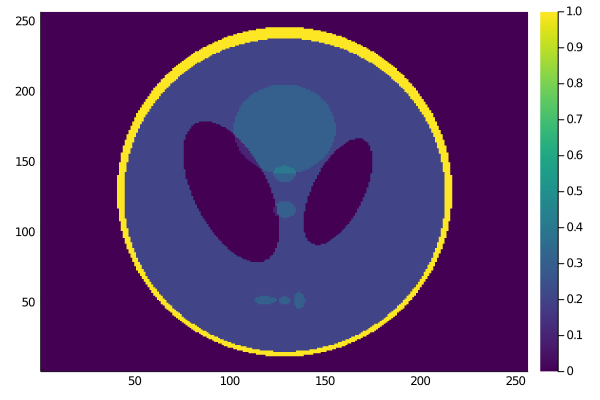

In [3]:
N = 256
im_shepp = shepp_logan(N)

heatmap(reverse(im_shepp,dims=1), c=:viridis)

#### Plot the fourier transform of the Shepp-Logan Phantom

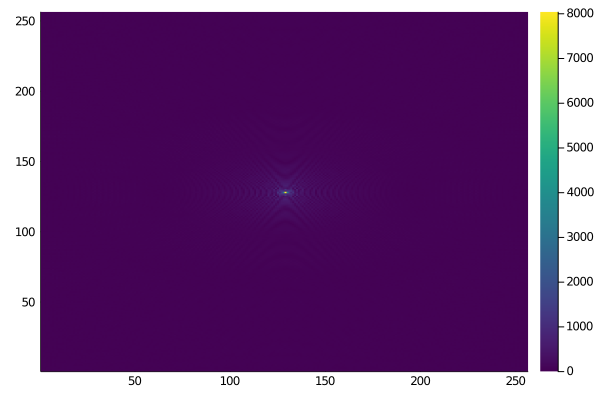

In [4]:
im_shepp_fft = fftshift(fft(im_shepp))
heatmap(reverse(abs.(im_shepp_fft),dims=1), c=:viridis)

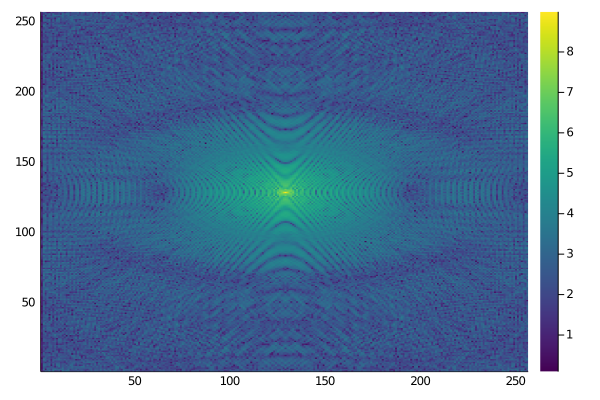

In [5]:
# For better visibility, plot on log scale
heatmap(reverse(log.(abs.(im_shepp_fft).+1.1),dims=1), c=:viridis)

#### Plot the Wavelets transform of the Shepp-Logan Phantom

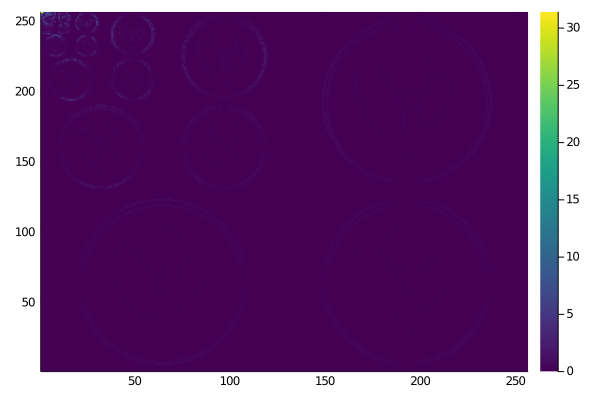

In [6]:
im_shepp_wav = dwt(im_shepp, wavelet(WT.db2))
heatmap(reverse(abs.(im_shepp_wav),dims=1), c=:viridis)

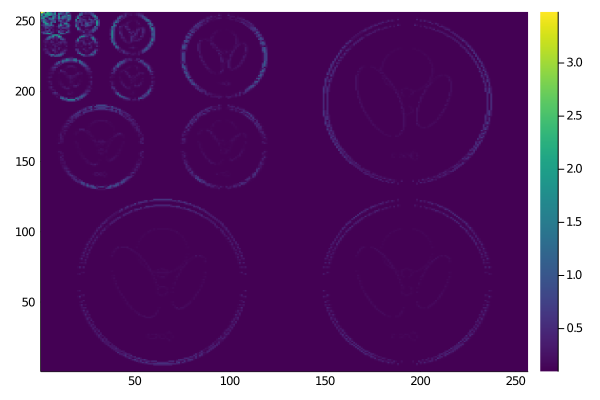

In [7]:
# For better visibility, plot on log scale
heatmap(reverse(log.(abs.(im_shepp_wav).+1.1),dims=1), c=:viridis)

## Question 9: Now get some data from [http://mridata.org/](http://mridata.org/), load it in Julia and do the same procedure as in the exercise above.

In [8]:
# Load data
filename = joinpath(dirname(pathof(MRIReco)),"../docs/src/examples/data/knee_3dFSE_slice170.h5")
f = ISMRMRDFile(filename)
acqData = AcquisitionData(f);
(nx, ny, nz) = acqData.encodingSize

# reconstruct image 
params = Dict{Symbol, Any}()
params[:reco] = "direct"
params[:reconSize] = (nx, ny) # this size is also contained in acqData.encodingSize

img = reconstruction(acqData, params)
img = sqrt.(sum(img.^2,dims=5))
img = img[:,:];

Direct Reconstruction...100%|███████████████████████████| Time: 0:00:03


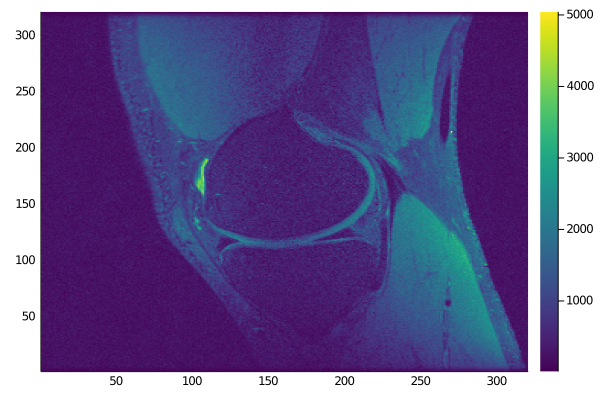

In [9]:
heatmap(reverse(abs.(img),dims=1), c=:viridis)

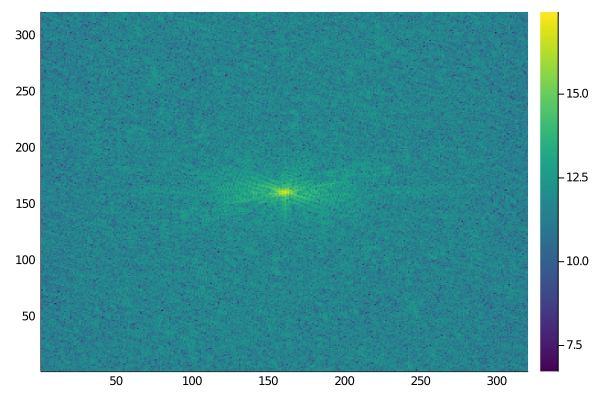

In [10]:
# Plot the fourier transform, again, on a log scale for visibility 
im_mri_fft = fftshift(fft(img))
heatmap(reverse(log.(abs.(im_mri_fft).+1.1),dims=1), c=:viridis)

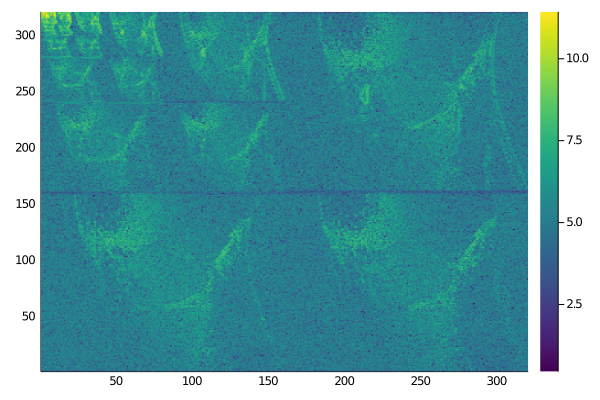

In [11]:
# Plot the wavelet transform, again, on a log scale for visibility 
im_mri_wav = dwt(img, wavelet(WT.db2))
heatmap(reverse(log.(abs.(im_mri_wav).+1.1),dims=1), c=:viridis)

## Question 10: Load an angiogram and a brain image in Julia, apply the Wavelets transform and the DCT transform to both and plot the histogram of coefficients. Compare, for the two different images, which transform performs better for a sparse representation. Discuss the results

#### Load an angiogram and a brain image

In [12]:
using Images, Plots, ImageView

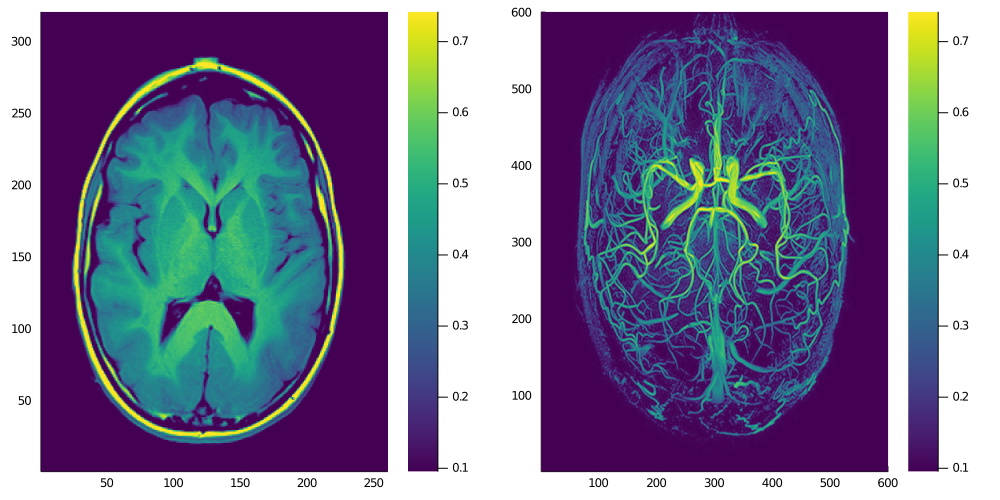

In [13]:
# Load brain MRI
brain_mri = load("brain_mri.jpg")
brain_mri = convert(Array{Float64}, Gray.(brain_mri))
brain_mri_view = heatmap(reverse(log.(abs.(brain_mri).+1.1),dims=1), c=:viridis)

# Load angiogram
brain_mra = load("brain_mra.jpeg")
brain_mra = convert(Array{Float64}, Gray.(brain_mra))
brain_mra_view = heatmap(reverse(log.(abs.(brain_mra).+1.1),dims=1), c=:viridis)

# Plot comparison
plot(brain_mri_view, brain_mra_view, layout = (1, 2), legend = false, size=(1000, 500))

#### Apply the Wavelet Transform

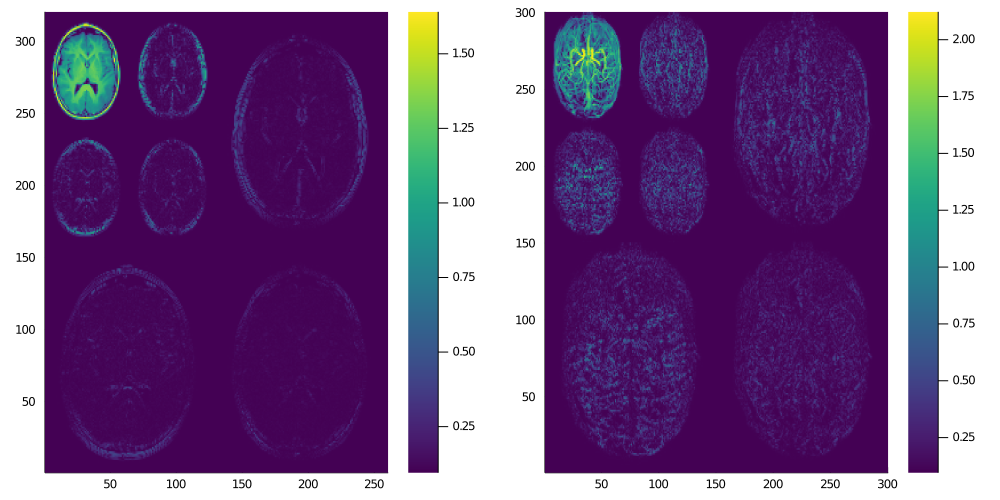

In [14]:
# Compute Wavelet Transform for brain MRI
brain_mri_wav = dwt(brain_mri, wavelet(WT.db2))
brain_mri_wav_view = heatmap(reverse(log.(abs.(brain_mri_wav).+1.1),dims=1), c=:viridis)

# Compute Wavelet Transform brain MRA
brain_mra_wav = dwt(brain_mra, wavelet(WT.db2))[1:convert(Int32,size(brain_mra,1)/2), 1:convert(Int32,size(brain_mra,2)/2)]
brain_mra_wav_view = heatmap(reverse(log.(abs.(brain_mra_wav).+1.1),dims=1), c=:viridis)

# Plot comparison
plot(brain_mri_wav_view, brain_mra_wav_view, layout = (1, 2), legend = false, size=(1000, 500))

#### Apply the Discrete Cosine Transform

In [15]:
using FFTW

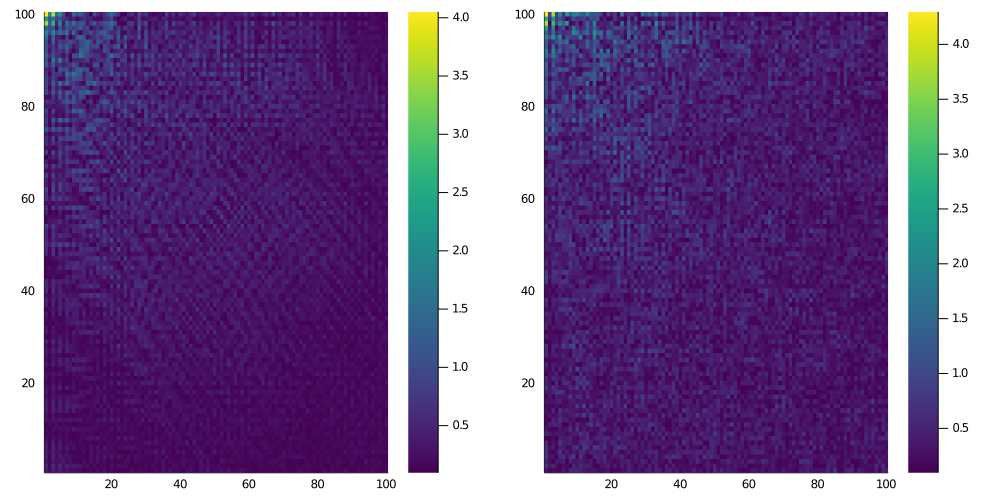

In [16]:
# Compute DCT of brain MRI
num_freqs_to_view = 100
brain_mri_dct = dct(brain_mri)[1:num_freqs_to_view, 1:num_freqs_to_view]
brain_mri_dct_view = heatmap(reverse(log.(abs.(brain_mri_dct).+1.1),dims=1), c=:viridis)

# Compute DCT of brain MRA
brain_mra_dct = dct(brain_mra)[1:num_freqs_to_view, 1:num_freqs_to_view]
brain_mra_dct_view = heatmap(reverse(log.(abs.(brain_mra_dct).+1.1),dims=1), c=:viridis)

# Plot comparison
plot(brain_mri_dct_view, brain_mra_dct_view, layout = (1, 2), legend = false, size=(1000, 500))

#### Compare, for the two different images, which transform performs better for a sparse representation. Discuss the results

The brain magnetic resonance angiogram visually appears to contain more higher frequency components than the brain magnetic resonance imaging. This is corroborated in both the Discrete Wavelet Transform and the Discrete Cosine Transform. The DWT shows a subband decomposition of the original images with the lowest frequency band in the top-left corner and increasingly higher subbands towards the bottom right corner. The DCT decomposes the images into spatial frequencies, again, with the lowest frequency component in the top left corner and increasing frequencies towards the bottom right corner. Both of these transformations are able to compact more energy into the lower frequency regions for the MRI images than the MRA images because of the greater sparsity present.